> ## **Practice Project : 7. Big Data Mart Sales Problem**
By: Ms. Yashshree bawiskar

Batch: 1838

**Big Data Mart Sales Problem**

**Problem Statement:**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/bigdatamart_rep

### Importing required liabaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing csv file of Train and Test

In [2]:
Train=pd.read_csv('bigdatamart_Train.csv')

In [3]:
print('\033[1m' +' Train Data No of Rows & Columns:'+str(Train.shape) +'\033[1m')

 Train Data No of Rows & Columns:(8523, 12)


In [4]:
Test=pd.read_csv('bigdatamart_Test.csv')

In [5]:
print('\033[1m' +' Test Data No of Rows & Columns:'+str(Test.shape) +'\033[1m')

 Test Data No of Rows & Columns:(5681, 11)


# Statistical Anaysis, Data Exploration & Cleaning on Train Dataset

In [6]:
Train.head(15)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            FDA15        9.300          Low Fat         0.016047   
1            DRC01        5.920          Regular         0.019278   
2            FDN15       17.500          Low Fat         0.016760   
3            FDX07       19.200          Regular         0.000000   
4            NCD19        8.930          Low Fat         0.000000   
5            FDP36       10.395          Regular         0.000000   
6            FDO10       13.650          Regular         0.012741   
7            FDP10          NaN          Low Fat         0.127470   
8            FDH17       16.200          Regular         0.016687   
9            FDU28       19.200          Regular         0.094450   
10           FDY07       11.800          Low Fat         0.000000   
11           FDA03       18.500          Regular         0.045464   
12           FDX32       15.100          Regular         0.100014   
13           FDS46       17.600          Regular         0.047257   
14           FDF32       16.350          Low Fat         0.068024   

                Item_Type  Item_MRP Outlet_Identifier  \
0                   Dairy  249.8092            OUT049   
1             Soft Drinks   48.2692            OUT018   
2                    Meat  141.6180            OUT049   
3   Fruits and Vegetables  182.0950            OUT010   
4               Household   53.8614            OUT013   
5            Baking Goods   51.4008            OUT018   
6             Snack Foods   57.6588            OUT013   
7             Snack Foods  107.7622            OUT027   
8            Frozen Foods   96.9726            OUT045   
9            Frozen Foods  187.8214            OUT017   
10  Fruits and Vegetables   45.5402            OUT049   
11                  Dairy  144.1102            OUT046   
12  Fruits and Vegetables  145.4786            OUT049   
13            Snack Foods  119.6782            OUT046   
14  Fruits and Vegetables  196.4426            OUT013   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                        1999      Medium               Tier 1   
1                        2009      Medium               Tier 3   
2                        1999      Medium               Tier 1   
3                        1998         NaN               Tier 3   
4                        1987        High               Tier 3   
5                        2009      Medium               Tier 3   
6                        1987        High               Tier 3   
7                        1985      Medium               Tier 3   
8                        2002         NaN               Tier 2   
9                        2007         NaN               Tier 2   
10                       1999      Medium               Tier 1   
11                       1997       Small               Tier 1   
12                       1999      Medium               Tier 1   
13                       1997       Small               Tier 1   
14                       1987        High               Tier 3   

          Outlet_Type  Item_Outlet_Sales  
0   Supermarket Type1          3735.1380  
1   Supermarket Type2           443.4228  
2   Supermarket Type1          2097.2700  
3       Grocery Store           732.3800  
4   Supermarket Type1           994.7052  
5   Supermarket Type2           556.6088  
6   Supermarket Type1           343.5528  
7   Supermarket Type3          4022.7636  
8   Supermarket Type1          1076.5986  
9   Supermarket Type1          4710.5350  
10  Supermarket Type1          1516.0266  
11  Supermarket Type1          2187.1530  
12  Supermarket Type1          1589.2646  
13  Supermarket Type1          2145.2076  
14  Supermarket Type1          1977.4260

In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Comment -
-  Train data contain 8523 rows with 11 features and 1 target variable.
-  Some feature are categorical in nature.
-  There is presense of Null values in data.
-  There is missing data in item weight, outlet size which need to impute with appropriate method.

In [8]:
Train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

Now will indentify the missing data

<AxesSubplot:>

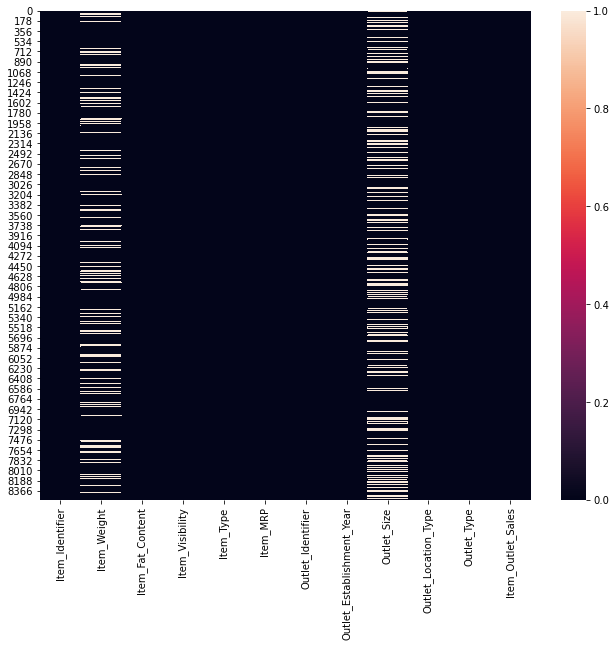

In [9]:
plt.figure(figsize=(11,9))
sns.heatmap(Train.isnull())

In [10]:
missing_values = Train.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(Train))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                           Missing Values  % Missing data
Outlet_Size                          2410       28.276428
Item_Weight                          1463       17.165317
Item_Identifier                         0        0.000000
Item_Fat_Content                        0        0.000000
Item_Visibility                         0        0.000000
Item_Type                               0        0.000000
Item_MRP                                0        0.000000
Outlet_Identifier                       0        0.000000
Outlet_Establishment_Year               0        0.000000
Outlet_Location_Type                    0        0.000000
Outlet_Type                             0        0.000000
Item_Outlet_Sales                       0        0.000000


**Comments:**
- 28.27% missing data in Outlet size
- 17.16% missing data in Item weight.
- Outlet which are very big in size normally have every varity of product avaiable at single place, massive customer footprint and in turn have higher sales. Outlet size is important feature in our analysis. hence we cannot just ignore missing data here.
- Tier 2 & 3 cities tend to have customer who do not store grocery in big number. Item weight is critical for them. Like Outlet size here also we cannot just ignore missing values.

## Now Indentifying Unique categories  of categorical data

**1. Item_Fat_Content**

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

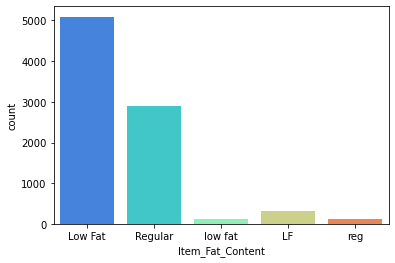

In [11]:
sns.countplot(Train['Item_Fat_Content'], palette='rainbow')

In [12]:
Train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
Train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Observation:

- Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’.

- We are going to convert them into two catgories - 1. Low Fat 2.Regular

In [14]:
Train['Item_Fat_Content']=Train['Item_Fat_Content'].replace('LF','Low Fat')
Train['Item_Fat_Content']=Train['Item_Fat_Content'].replace('low fat','Low Fat')
Train['Item_Fat_Content']=Train['Item_Fat_Content'].replace('reg','Regular')

In [15]:
Train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**2. Item_Type & Item_Identifier**

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

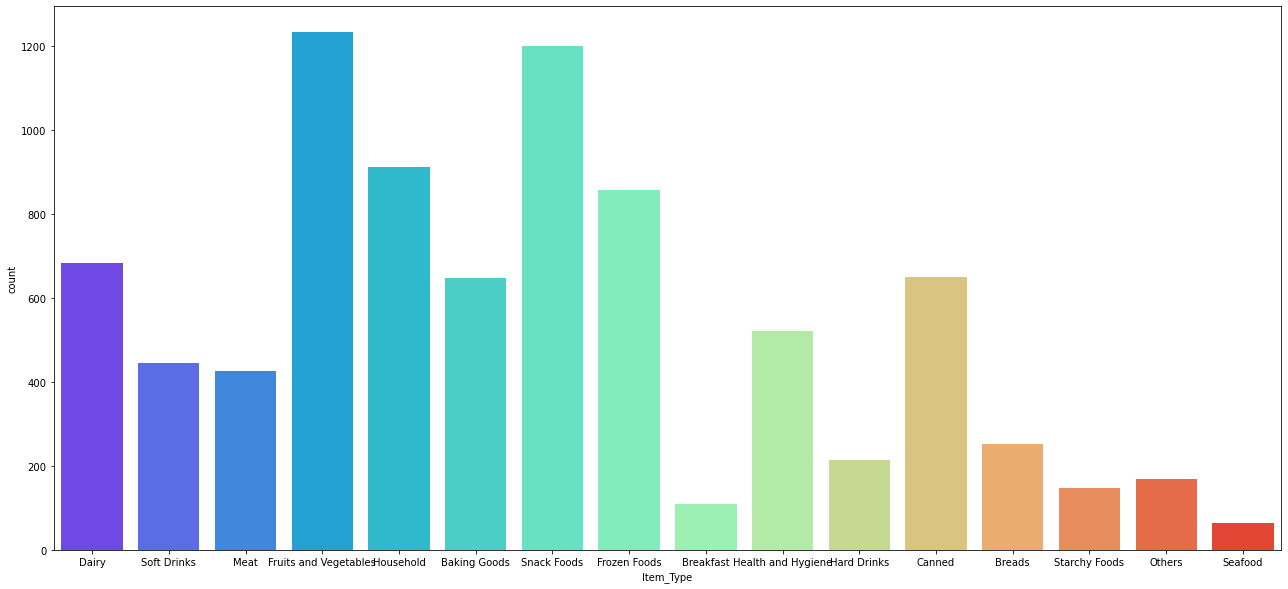

In [16]:
plt.figure(figsize=(22,10))
sns.countplot(Train['Item_Type'], palette='rainbow', orient='h')

In [17]:
Train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
Train['Item_Type'].nunique()

16

- There are 1599 products within 16 different item categories in Big Data Mart store.

In [19]:
Train['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

***If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables.So I’ve used the Item_Identifier variable to create a new column to simplify further analysis.****

In [20]:
#Item type combine:
Train['Item_Type_Combined'] = Train['Item_Identifier'].apply(lambda x: x[0:2])
Train['Item_Type_Combined'] = Train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
Train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

- A fat-content should not be specified for Non-consumables them. So I created a new category as Non-Edible for such Nonconsumable under Item Fat Content Column.

In [21]:
Train.loc[Train['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
Train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [22]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

**3. Outlet_Identifier**

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

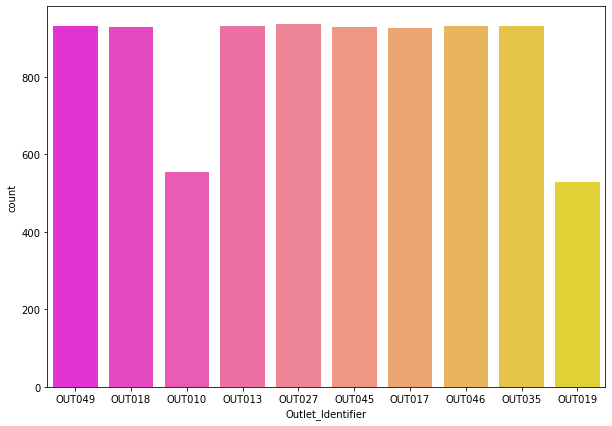

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(Train['Outlet_Identifier'], palette='spring')

**4.Outlet_type**

In [24]:
Train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

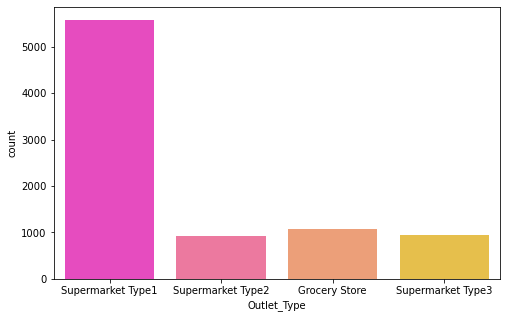

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(Train['Outlet_Type'], palette='spring')

In [26]:
#Check the mean sales by type:
Train.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

Item_Outlet_Sales
Outlet_Type                         
Grocery Store             339.828500
Supermarket Type1        2316.181148
Supermarket Type2        1995.498739
Supermarket Type3        3694.038558

- Comment -
**Maximum Number of Outlet are in Tier 3 Cities and they Genearte maximum revenue as compare to Tier 1 & Tier 2 **

**NOW WILL HANDLE THE MISSING VALUES**

1.  Imputation of Item Weight

In [27]:
Train['Item_Weight'].isnull().sum()

1463

Now we iwll impute the item weight by the average of weight of particular item as per item identifier

In [28]:
Train.head(15)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            FDA15        9.300          Low Fat         0.016047   
1            DRC01        5.920          Regular         0.019278   
2            FDN15       17.500          Low Fat         0.016760   
3            FDX07       19.200          Regular         0.000000   
4            NCD19        8.930       Non-Edible         0.000000   
5            FDP36       10.395          Regular         0.000000   
6            FDO10       13.650          Regular         0.012741   
7            FDP10          NaN          Low Fat         0.127470   
8            FDH17       16.200          Regular         0.016687   
9            FDU28       19.200          Regular         0.094450   
10           FDY07       11.800          Low Fat         0.000000   
11           FDA03       18.500          Regular         0.045464   
12           FDX32       15.100          Regular         0.100014   
13           FDS46       17.600          Regular         0.047257   
14           FDF32       16.350          Low Fat         0.068024   

                Item_Type  Item_MRP Outlet_Identifier  \
0                   Dairy  249.8092            OUT049   
1             Soft Drinks   48.2692            OUT018   
2                    Meat  141.6180            OUT049   
3   Fruits and Vegetables  182.0950            OUT010   
4               Household   53.8614            OUT013   
5            Baking Goods   51.4008            OUT018   
6             Snack Foods   57.6588            OUT013   
7             Snack Foods  107.7622            OUT027   
8            Frozen Foods   96.9726            OUT045   
9            Frozen Foods  187.8214            OUT017   
10  Fruits and Vegetables   45.5402            OUT049   
11                  Dairy  144.1102            OUT046   
12  Fruits and Vegetables  145.4786            OUT049   
13            Snack Foods  119.6782            OUT046   
14  Fruits and Vegetables  196.4426            OUT013   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                        1999      Medium               Tier 1   
1                        2009      Medium               Tier 3   
2                        1999      Medium               Tier 1   
3                        1998         NaN               Tier 3   
4                        1987        High               Tier 3   
5                        2009      Medium               Tier 3   
6                        1987        High               Tier 3   
7                        1985      Medium               Tier 3   
8                        2002         NaN               Tier 2   
9                        2007         NaN               Tier 2   
10                       1999      Medium               Tier 1   
11                       1997       Small               Tier 1   
12                       1999      Medium               Tier 1   
13                       1997       Small               Tier 1   
14                       1987        High               Tier 3   

          Outlet_Type  Item_Outlet_Sales Item_Type_Combined  
0   Supermarket Type1          3735.1380               Food  
1   Supermarket Type2           443.4228             Drinks  
2   Supermarket Type1          2097.2700               Food  
3       Grocery Store           732.3800               Food  
4   Supermarket Type1           994.7052     Non-Consumable  
5   Supermarket Type2           556.6088               Food  
6   Supermarket Type1           343.5528               Food  
7   Supermarket Type3          4022.7636               Food  
8   Supermarket Type1          1076.5986               Food  
9   Supermarket Type1          4710.5350               Food  
10  Supermarket Type1          1516.0266               Food  
11  Supermarket Type1          2187.1530               Food  
12  Supermarket Type1          1589.2646               Food  
13  Supermarket Type1          2145.2076               Food 

In [29]:
Mean_Item_Weight=Train.groupby('Item_Type').agg({'Item_Weight':'mean'})
Mean_Item_Weight

Item_Weight
Item_Type                         
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731

In [30]:
#dictionary with Item_Type values as keys and avg_wt values as values.
Mean_Zip=dict(zip(Mean_Item_Weight.index,Mean_Item_Weight.Item_Weight))

# This creates a column "mean_zip" and maps values into it based on corresponding values of 'Item_Type'
Train['Mean_Zip']=Train['Item_Type'].map(Mean_Zip)

#filling null values in 'Item_Weight' with values from 
Train['Item_Weight']=Train['Item_Weight'].fillna(Train['Mean_Zip'])

In [31]:
Train['Item_Weight'].isna().sum()

0

In [32]:
Train.drop(columns='Mean_Zip',inplace=True)

#### Imputation of Outlet Size

In [33]:
Train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [34]:
Train['Outlet_Size'].isna().sum()

2410

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

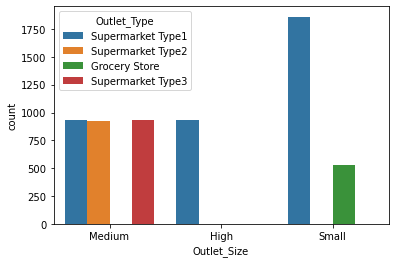

In [35]:
sns.countplot('Outlet_Size',hue='Outlet_Type',data=Train)

In [36]:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = Train.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )

In [37]:
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [38]:
Miss_Value = Train['Outlet_Size'].isnull() 
Train.loc[Miss_Value,'Outlet_Size'] = Train.loc[Miss_Value,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(Train['Outlet_Size'].isnull()))

0


- Missing Values table after imputation

In [39]:
missing_values = Train.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(Train))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                           Missing Values  % Missing data
Item_Identifier                         0             0.0
Item_Weight                             0             0.0
Item_Fat_Content                        0             0.0
Item_Visibility                         0             0.0
Item_Type                               0             0.0
Item_MRP                                0             0.0
Outlet_Identifier                       0             0.0
Outlet_Establishment_Year               0             0.0
Outlet_Size                             0             0.0
Outlet_Location_Type                    0             0.0
Outlet_Type                             0             0.0
Item_Outlet_Sales                       0             0.0
Item_Type_Combined                      0             0.0


## Exploration of Train Numerical data

#### Item_Visibility

The min value of Item_Visibility is 0, but this can not be as every item which sold over store must have some visibility.

In [40]:
Train[Train['Item_Visibility']==0]['Item_Identifier'].nunique()

446

In [41]:
# visual check that the 0 values in the firs 10 entries have been replaced
Train['Item_Visibility']=Train['Item_Visibility'].replace(0,np.nan)

In [42]:
Train['Item_Visibility'].fillna(Train['Item_Visibility'].median(),inplace=True)

In [43]:
Train[Train['Item_Visibility']==0]['Item_Identifier'].nunique()

0

## Outlet_Establishment_Year

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

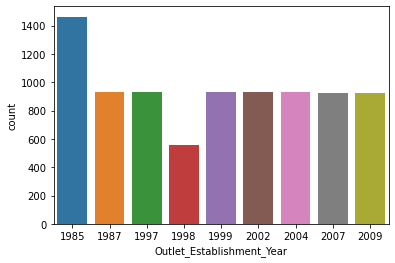

In [44]:
sns.countplot(Train.Outlet_Establishment_Year)

In [45]:
Train['Outlet_Age'] = Train['Outlet_Establishment_Year'].apply(lambda x:2013-x)

In [46]:
Train['Outlet_Age'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

****

# Statistical Anaysis, Data Exploration & Cleaning on Test Dataset

In [47]:
Test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [48]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


**Now we are going repeat  all the steps that we perform on Training dataset :**
1. Missing Value Indentification
2. Modify categories of Item_Fat_Content
3. Create a broad category of Type of Item
4. Imputation of Missing Values
5. Modify Item_Visibility
6. Determine the years of operation of a store**

Step 1. Missing Value Indentification

<AxesSubplot:>

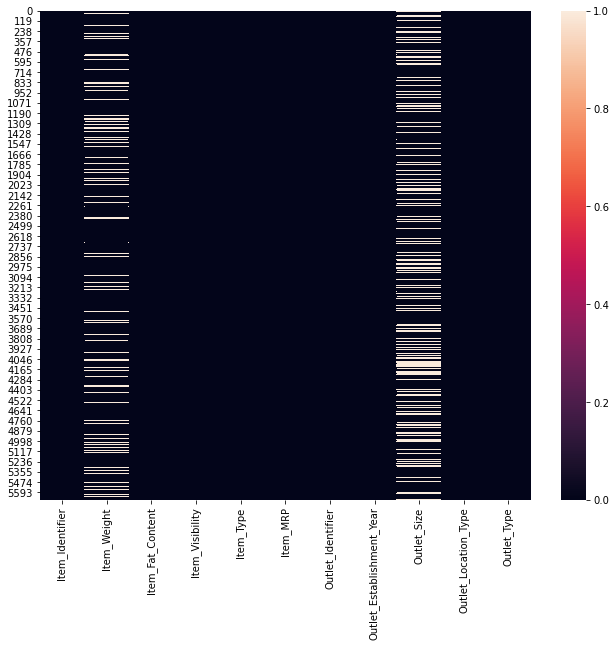

In [49]:
plt.figure(figsize=(11,9))
sns.heatmap(Test.isnull())

In [50]:
missing_values = Test.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(Test))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                           Missing Values  % Missing data
Outlet_Size                          1606       28.269671
Item_Weight                           976       17.180074
Item_Identifier                         0        0.000000
Item_Fat_Content                        0        0.000000
Item_Visibility                         0        0.000000
Item_Type                               0        0.000000
Item_MRP                                0        0.000000
Outlet_Identifier                       0        0.000000
Outlet_Establishment_Year               0        0.000000
Outlet_Location_Type                    0        0.000000
Outlet_Type                             0        0.000000


Step 2. Modify categories of Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

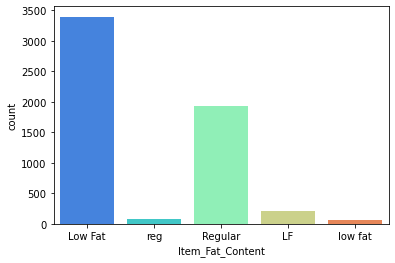

In [51]:
sns.countplot(Test['Item_Fat_Content'], palette='rainbow')

In [52]:
Test['Item_Fat_Content']=Test['Item_Fat_Content'].replace('LF','Low Fat')
Test['Item_Fat_Content']=Test['Item_Fat_Content'].replace('low fat','Low Fat')
Test['Item_Fat_Content']=Test['Item_Fat_Content'].replace('reg','Regular')

In [53]:
Test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

Step 3. Create a broad category of Type of Item

In [54]:
##Item type combine:

Test['Item_Type_Combined'] = Test['Item_Identifier'].apply(lambda x: x[0:2])
Test['Item_Type_Combined'] = Test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
Test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

Step 4. Imputation of Missing Values

4.1. Imputation of Item Weight

In [55]:
Test['Item_Weight'].isnull().sum()

976

Lets impute the Item Weight by the average weight of the particular item as per Item_Identifier

In [56]:
mean_item_weight=Test.groupby('Item_Type').agg({'Item_Weight':'mean'})
mean_item_weight

Item_Weight
Item_Type                         
Baking Goods             12.272418
Breads                   10.866799
Breakfast                13.759603
Canned                   12.393565
Dairy                    12.955040
Frozen Foods             12.101543
Fruits and Vegetables    13.146659
Hard Drinks              11.844417
Health and Hygiene       13.216929
Household                13.270504
Meat                     12.702148
Others                   14.009725
Seafood                  13.241136
Snack Foods              12.684256
Soft Drinks              11.691965
Starchy Foods            13.618247

In [57]:
#dictionary with Item_Type values as keys and avg_wt values as values.
mean_zip=dict(zip(mean_item_weight.index,mean_item_weight.Item_Weight))

# This creates a column "mean_zip" and maps values into it based on corresponding values of 'Item_Type'
Test['mean_zip']=Test['Item_Type'].map(mean_zip)

#filling null values in 'Item_Weight' with values from 
Test['Item_Weight']=Test['Item_Weight'].fillna(Test['mean_zip'])

In [58]:
Test['Item_Weight'].isna().sum()

0

In [59]:
Test.drop(columns='mean_zip',inplace=True)

4.2. Imputation of Outlet Size

In [60]:
Test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [61]:
Test['Outlet_Size'].isna().sum()

1606

In [62]:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = Test.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )

In [63]:
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [64]:
miss_value = Test['Outlet_Size'].isnull() 
Test.loc[miss_value,'Outlet_Size'] = Test.loc[miss_value,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(Test['Outlet_Size'].isnull()))

0


Missing Values table after imputation

In [65]:
missing_values = Test.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(Test))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                           Missing Values  % Missing data
Item_Identifier                         0             0.0
Item_Weight                             0             0.0
Item_Fat_Content                        0             0.0
Item_Visibility                         0             0.0
Item_Type                               0             0.0
Item_MRP                                0             0.0
Outlet_Identifier                       0             0.0
Outlet_Establishment_Year               0             0.0
Outlet_Size                             0             0.0
Outlet_Location_Type                    0             0.0
Outlet_Type                             0             0.0
Item_Type_Combined                      0             0.0


Step 5. Modify Item_Visibility

In [66]:
Test[Test['Item_Visibility']==0]['Item_Identifier'].nunique()

321

In [67]:
# visual check that the 0 values in the firs 10 entries have been replaced
Test['Item_Visibility']=Test['Item_Visibility'].replace(0,np.nan)

In [68]:
Test['Item_Visibility'].fillna(Test['Item_Visibility'].median(),inplace=True)

In [69]:
Test[Test['Item_Visibility']==0]['Item_Identifier'].nunique()

0

Step 6. Determine the years of operation of a store

In [70]:
Test['Outlet_Age'] = Test['Outlet_Establishment_Year'].apply(lambda x:2013-x)

In [71]:
Test['Outlet_Age'].head()

0    14
1     6
2    15
3     6
4    28
Name: Outlet_Age, dtype: int64

### Now will do exploratory data anaylsis

In [72]:
Test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58     20.75000          Low Fat         0.007565  Snack Foods   
1           FDW14      8.30000          Regular         0.038428        Dairy   
2           NCN55     14.60000          Low Fat         0.099575       Others   
3           FDQ58      7.31500          Low Fat         0.015388  Snack Foods   
4           FDY38     12.95504          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007       Small   
2  241.7538            OUT010                       1998       Small   
3  155.0340            OUT017                       2007       Small   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type Item_Type_Combined  Outlet_Age  
0               Tier 1  Supermarket Type1               Food          14  
1               Tier 2  Supermarket Type1               Food           6  
2               Tier 3      Grocery Store     Non-Consumable          15  
3               Tier 2  Supermarket Type1               Food           6  
4               Tier 3  Supermarket Type3               Food          28

In [73]:
Test.shape

(5681, 13)

In [74]:
df=Train.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined'])

In [75]:
df1=Test.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined'])

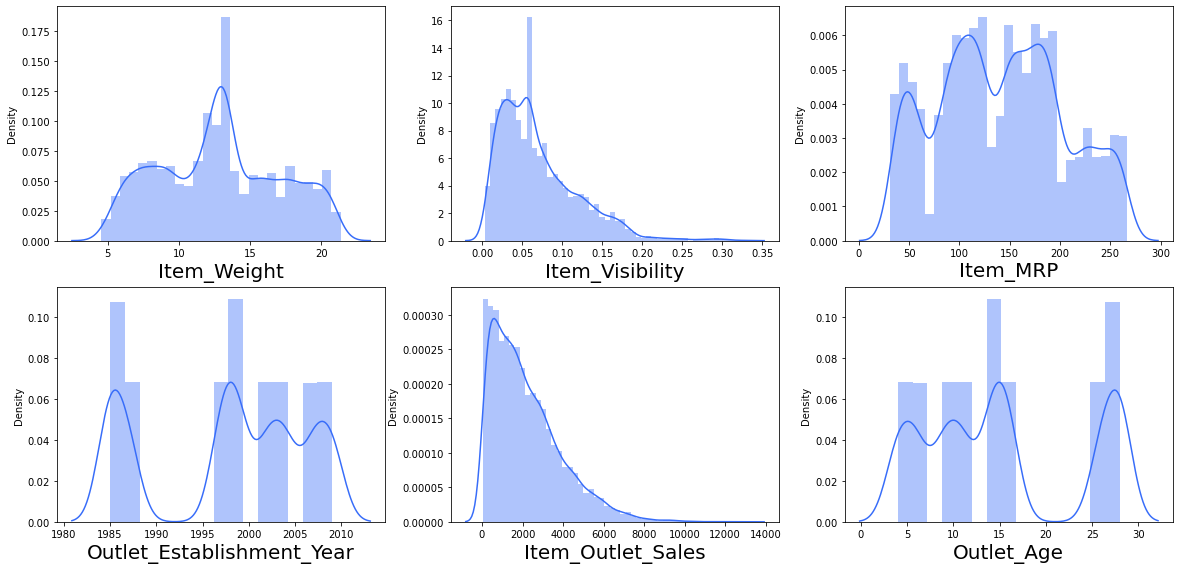

In [76]:
plt.figure(figsize=(20,25), facecolor='white')
sns.set_palette('rainbow')
plotnumber =1
for column in df:
    if plotnumber <=6:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

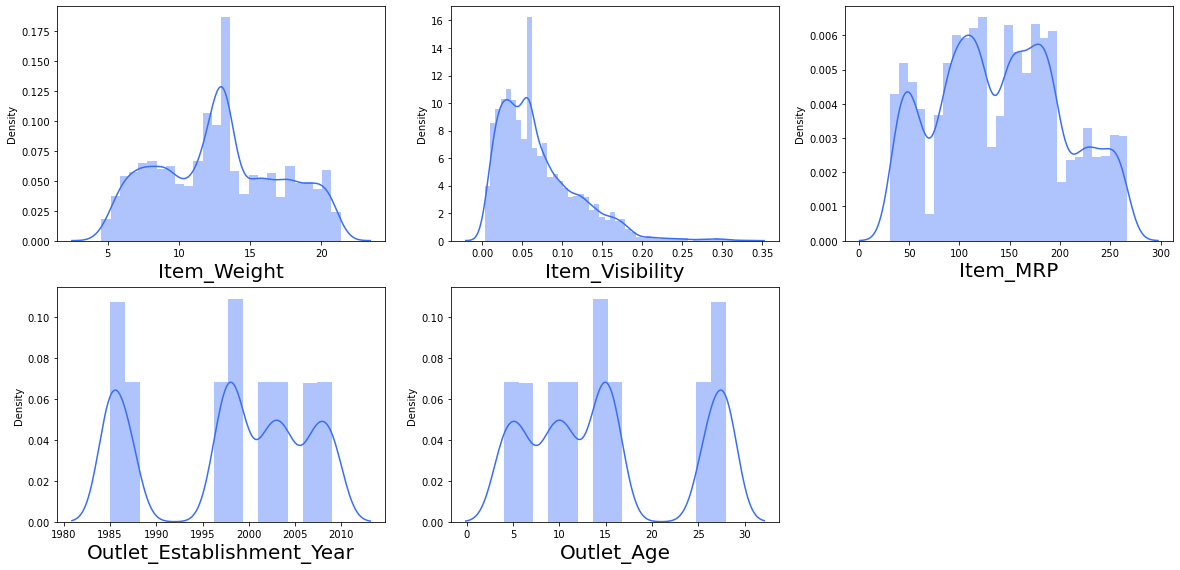

In [77]:
plt.figure(figsize=(20,25), facecolor='white')
sns.set_palette('rainbow')
plotnumber =1
for column in df1:
    if plotnumber <=6:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Box plot for outliers detection in Training data

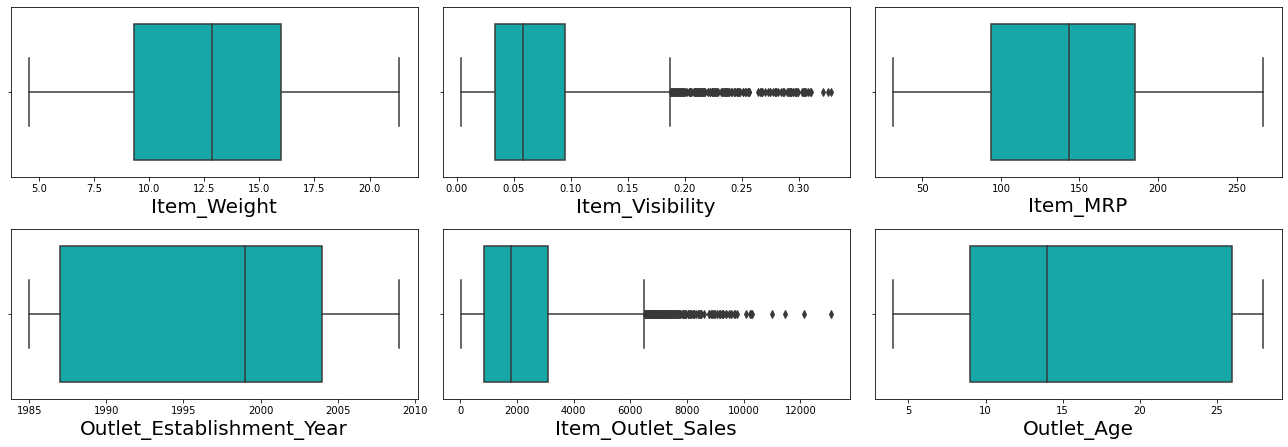

In [85]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=6:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Box plot for outliers detection in Testing data

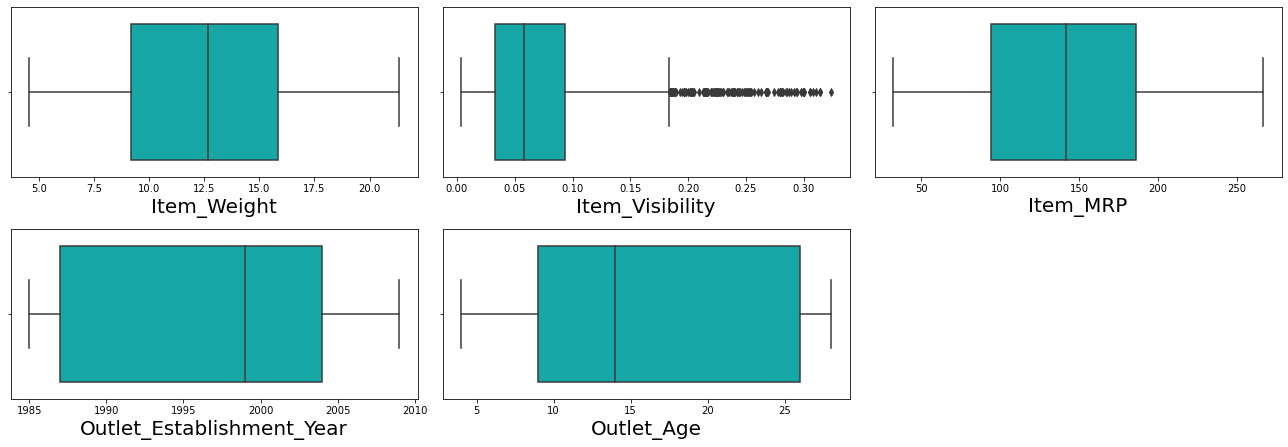

In [84]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df1:
    if plotnumber <=6:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df1[column], color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

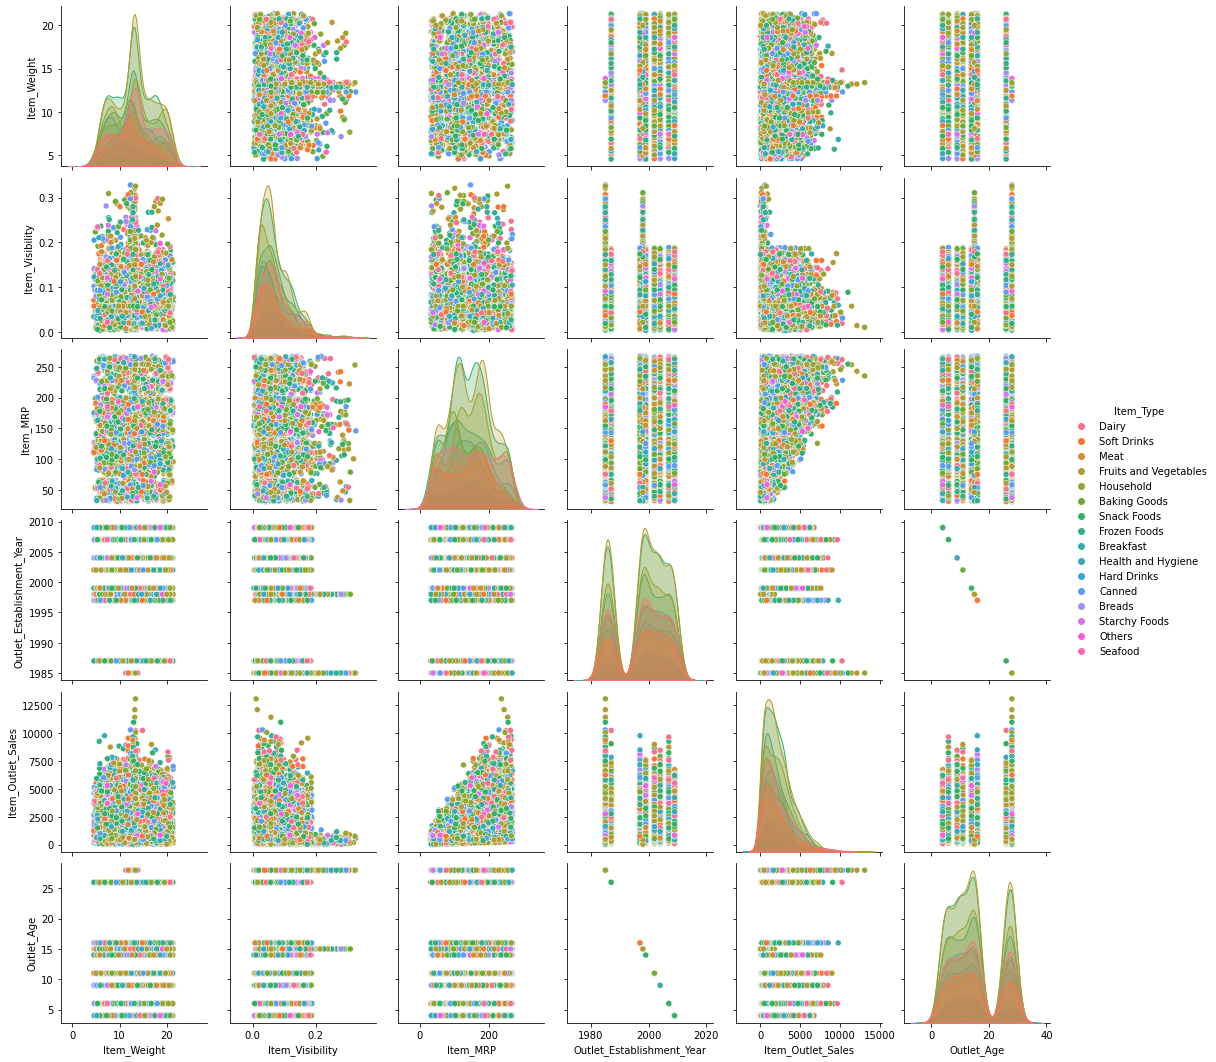

In [86]:
sns.pairplot(Train, hue='Item_Type')

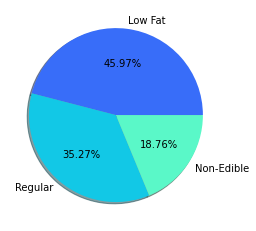

In [87]:
labels = 'Low Fat','Regular','Non-Edible'
fig, ax = plt.subplots()
ax.pie(Train.Item_Fat_Content.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

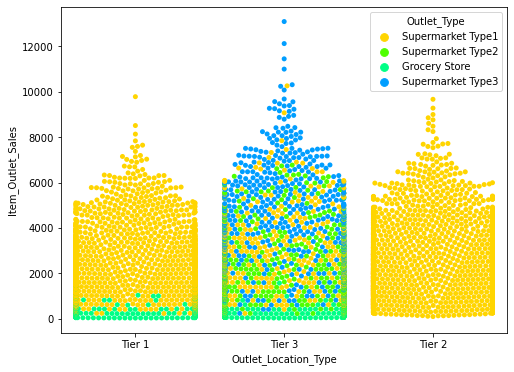

In [88]:
sns.set_palette('hsv')
plt.figure(figsize=(8,6))

sns.swarmplot(data=Train, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type')

In [89]:
Train.pivot_table(values='Item_Outlet_Sales', index='Outlet_Location_Type')

Item_Outlet_Sales
Outlet_Location_Type                   
Tier 1                      1876.909159
Tier 2                      2323.990559
Tier 3                      2279.627651

Comment -
Tier 3 Cities generate the most revenue and majority of revenue comes from Supermarket Type 2 and Type 3 along with Grocery stores.
Tier 2 and Tier 1 cities have more of Supermarket Type1 with a few Grocery stores.

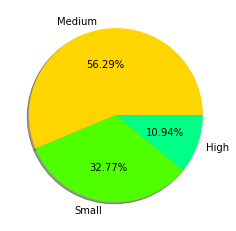

In [91]:
labels = 'Medium','Small','High' 
fig, ax = plt.subplots()
ax.pie(Train.Outlet_Size.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

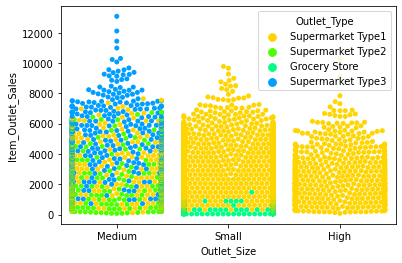

In [92]:
sns.swarmplot(data=Train, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Type')

Text(0.5, 1.0, 'Sales based on Item Visibility Sorted by Item Type')

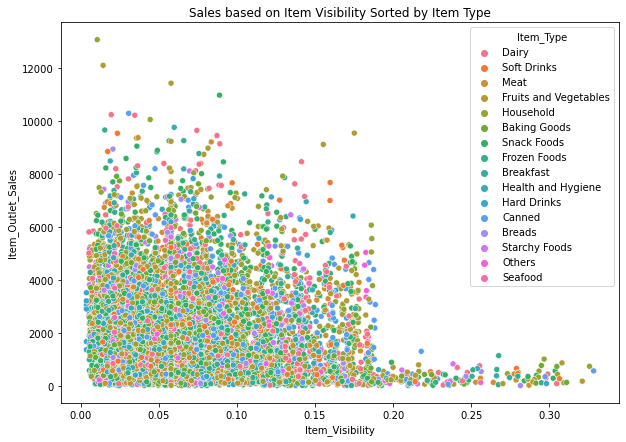

In [93]:
plt.figure(figsize=[10,7])
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales',hue='Item_Type',data=Train)
plt.title("Sales based on Item Visibility Sorted by Item Type")

Text(0.5, 1.0, 'Sales based on Item Visibility Sorted by Item Type Combined')

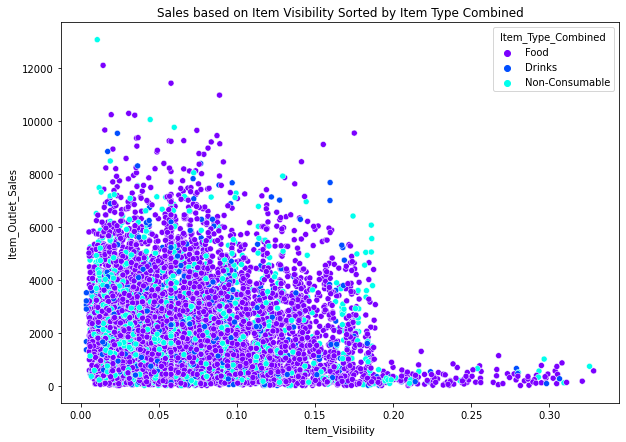

In [94]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=[10,7])
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales',hue='Item_Type_Combined',data=Train)
plt.title("Sales based on Item Visibility Sorted by Item Type Combined")

Text(0.5, 1.0, 'Sales based on Item Visibility Sorted by Item Type Combined')

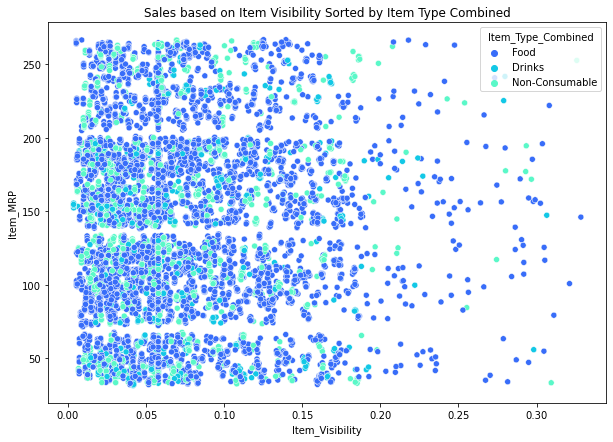

In [95]:
sns.set_palette('rainbow')
plt.figure(figsize=[10,7])
sns.scatterplot(x='Item_Visibility', y='Item_MRP',hue='Item_Type_Combined',data=Train)
plt.title("Sales based on Item Visibility Sorted by Item Type Combined")

Text(0.5, 1.0, 'Sales based on Item MRP Sorted by outlet Type Combined')

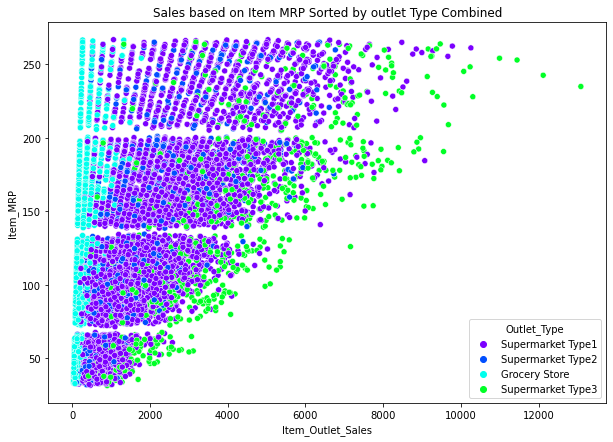

In [105]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=[10,7])
sns.scatterplot(x='Item_Outlet_Sales', y='Item_MRP',hue='Outlet_Type',data=Train)
plt.title("Sales based on Item MRP Sorted by outlet Type Combined")

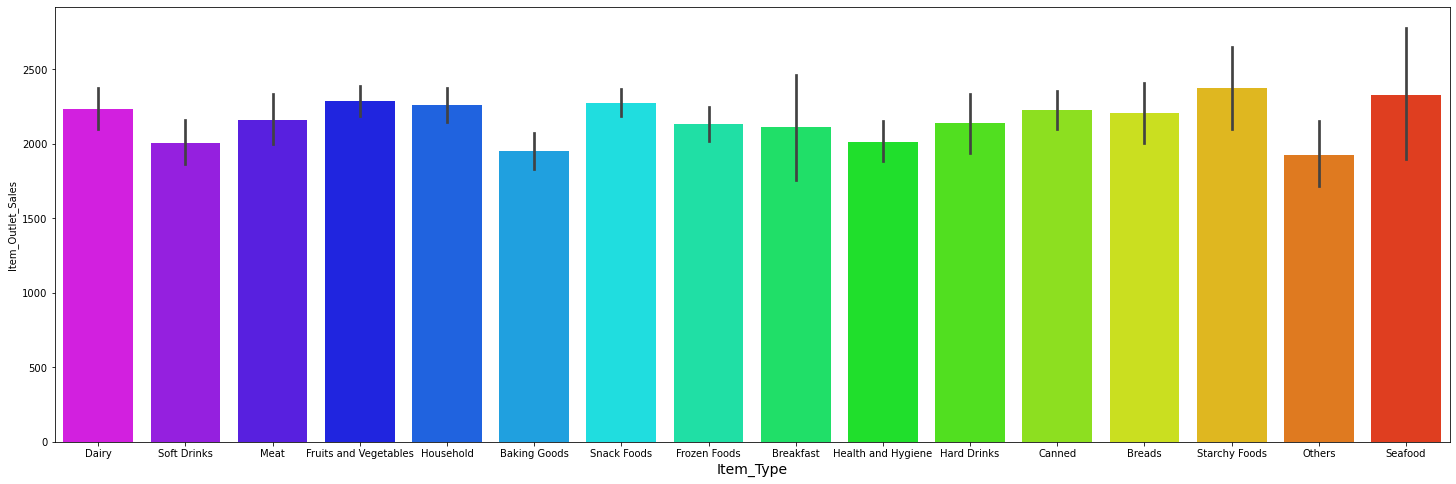

In [107]:
plt.figure(figsize=(25,8))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=Train ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

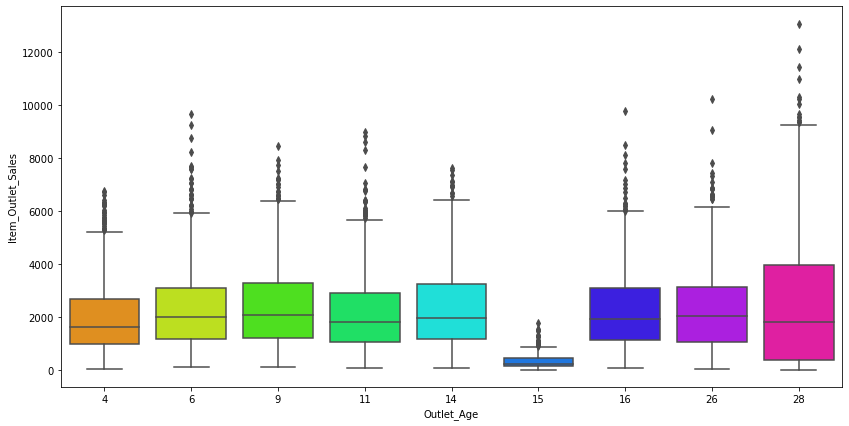

In [108]:
plt.figure(figsize = (14,7))
ax = sns.boxplot(x ='Outlet_Age' ,y='Item_Outlet_Sales',data=Train,palette="hsv" )

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

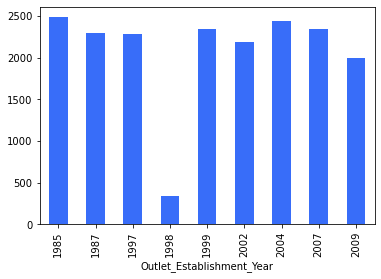

In [109]:
sns.set_palette('rainbow')
Train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

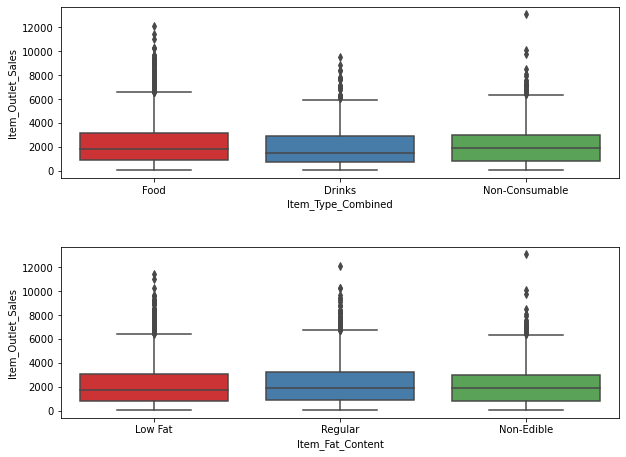

In [110]:
plt.figure(figsize = (10,9))

plt.subplot(411)
ax = sns.boxplot(x ='Item_Type_Combined' ,y='Item_Outlet_Sales',data=Train,palette="Set1" )

plt.subplot(412)
ax = sns.boxplot(x ='Item_Fat_Content' ,y='Item_Outlet_Sales',data=Train,palette="Set1" )

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

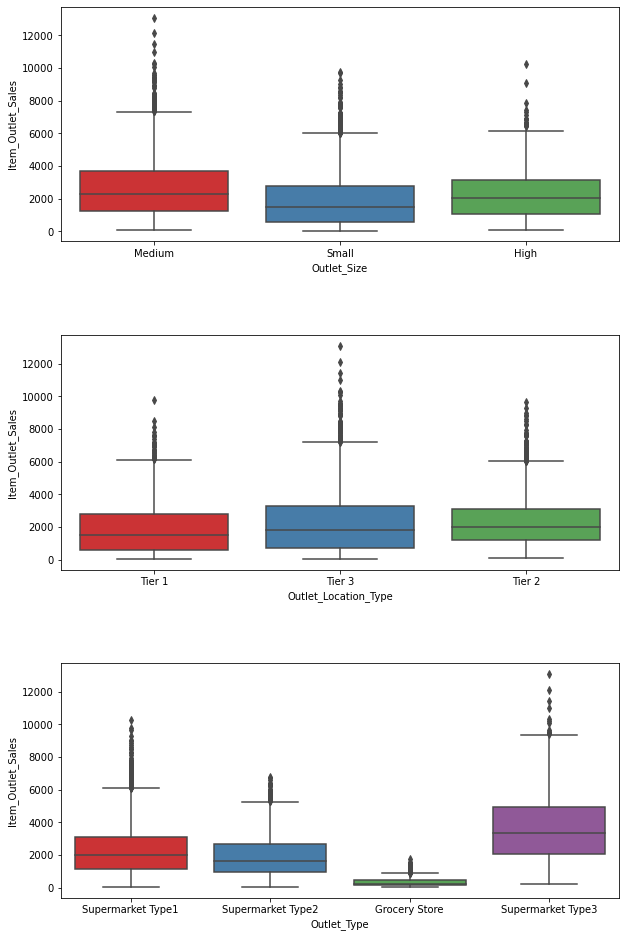

In [111]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=Train, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=Train, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=Train, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

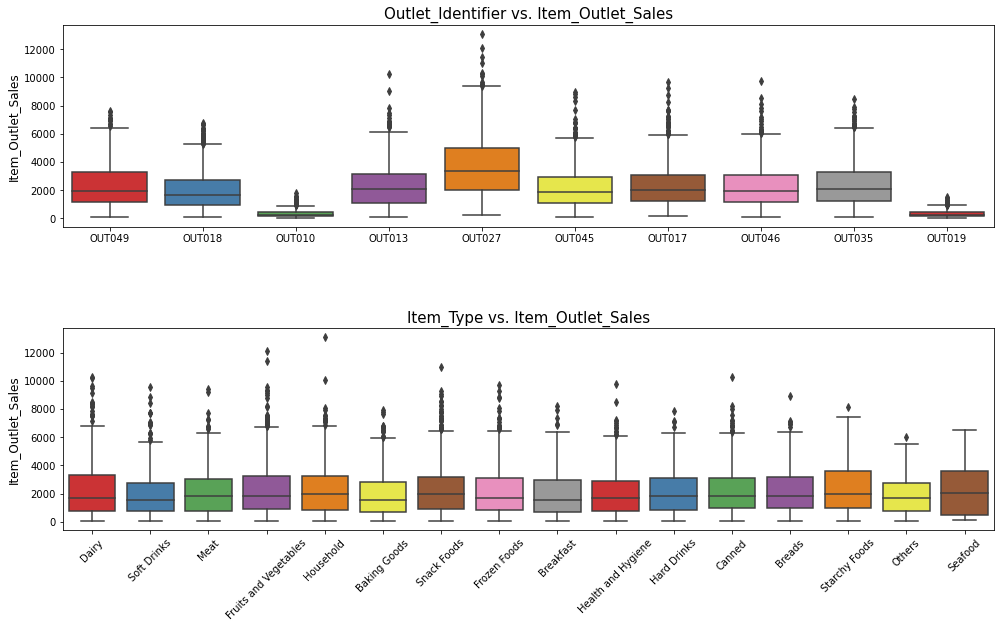

In [112]:
plt.figure(figsize = (14,16))

plt.subplot(411)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=Train, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(412)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=Train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1584x648 with 0 Axes>

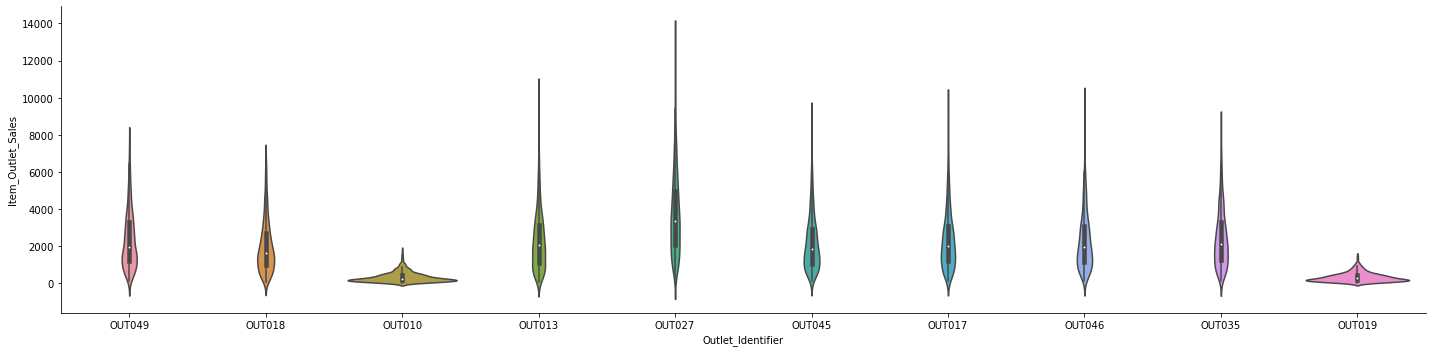

In [113]:
plt.figure(figsize = (22,9))
sns.catplot('Outlet_Identifier','Item_Outlet_Sales',kind = 'violin',data = Train,aspect = 4)
plt.tight_layout()

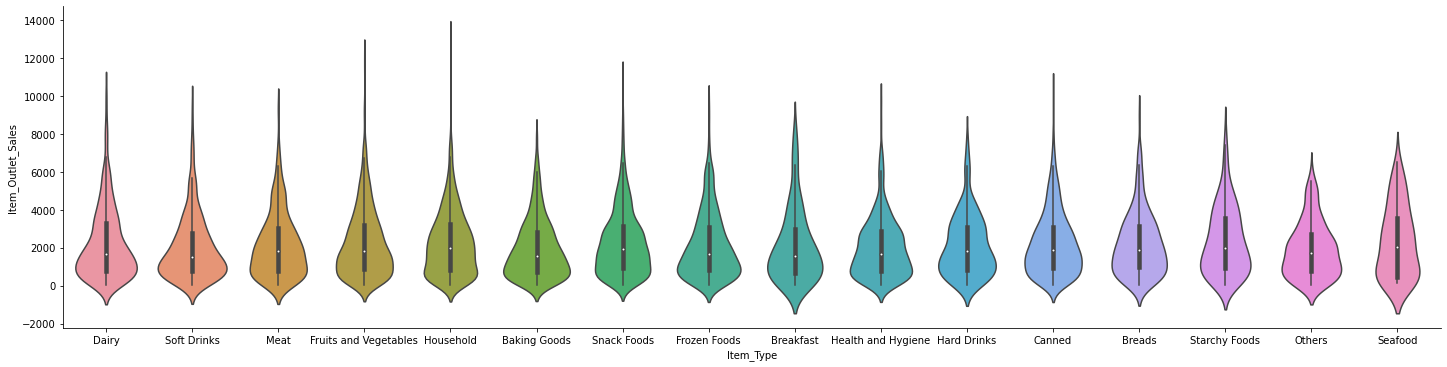

In [114]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data =Train, aspect=4)

Comment -
- The width of a violin plot at a particular level indicates the concentration or density of data at that level. The height of a violin tells us about the range of the target variable values.
- The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

## Outliers Detection and Removal In Training data

In [98]:
df_Train =Train.copy()
Q1 =df_Train.quantile(0.25)
Q3= df_Train.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Item_Weight                     6.6900
Item_Visibility                 0.0615
Item_MRP                       91.8172
Outlet_Establishment_Year      17.0000
Item_Outlet_Sales            2267.0490
Outlet_Age                     17.0000
dtype: float64


In [100]:
df_Train_new =df_Train[~((df_Train <(Q1 - 1.5*IQR)) | (df_Train >(Q3 + 1.5*IQR))).any(axis=1)]


In [102]:
print(df_Train_new.shape)

(8164, 14)


In [101]:
Train.shape

(8523, 14)

In [103]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((8523-8164)/8523)*100,'%')

Percentage Data Loss : 4.212131878446557 %


## Outliers Detection and Removal In Testing data

In [116]:
df_Test= Test.copy()
Q1 =df_Test.quantile(0.25)
Q3= df_Test.quantile(0.75)
IQR = Q3-Q1
print(IQR)


Item_Weight                   6.655000
Item_Visibility               0.060255
Item_MRP                     91.614600
Outlet_Establishment_Year    17.000000
Outlet_Age                   17.000000
dtype: float64


In [118]:
df_Test_new =df_Test[~((df_Test <(Q1 - 1.5*IQR)) | (df_Test >(Q3 + 1.5*IQR))).any(axis=1)]
print(df_Test_new.shape)

(5547, 13)


In [119]:
Test.shape

(5681, 13)

In [120]:
print("\033[1m"+'Percentage Data Loss in Test dataset :'+"\033[0m",((5681-5547)/5681)*100,'%')

Percentage Data Loss in Test dataset : 2.358739658510826 %


## Skewness of features

In [121]:
df_Train_new.skew()

Item_Weight                  0.085535
Item_Visibility              0.817387
Item_MRP                     0.151467
Outlet_Establishment_Year   -0.439854
Item_Outlet_Sales            0.767719
Outlet_Age                   0.439854
dtype: float64

- Comment -
 - Optimal range for skewness is -0.5 to 0.5.
 - Item_Visibility and Item_Outlet_Sales are Skewed in nature, need to transform.

Transforming positive or right skew data using boxcox transformation

In [122]:
from scipy.stats import boxcox

In [123]:
df_Train_new['Item_Visibility']=boxcox(df_Train_new['Item_Visibility'],0.5)

In [124]:
df_Train_new['Item_Outlet_Sales']=boxcox(df_Train_new['Item_Outlet_Sales'],0.5)

In [125]:
df_Train_new.skew()

Item_Weight                  0.085535
Item_Visibility              0.216697
Item_MRP                     0.151467
Outlet_Establishment_Year   -0.439854
Item_Outlet_Sales            0.050109
Outlet_Age                   0.439854
dtype: float64

In [126]:
df_Train_new.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012483  0.026905   
Item_Visibility              -0.012483         1.000000  0.001078   
Item_MRP                      0.026905         0.001078  1.000000   
Outlet_Establishment_Year    -0.008778        -0.030321  0.026834   
Item_Outlet_Sales             0.008238        -0.084008  0.553883   
Outlet_Age                    0.008778         0.030321 -0.026834   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.008778           0.008238   
Item_Visibility                            -0.030321          -0.084008   
Item_MRP                                    0.026834           0.553883   
Outlet_Establishment_Year                   1.000000           0.030331   
Item_Outlet_Sales                           0.030331           1.000000   
Outlet_Age                                 -1.000000          -0.030331   

                           Outlet_Age  
Item_Weight                  0.008778  
Item_Visibility              0.030321  
Item_MRP                    -0.026834  
Outlet_Establishment_Year   -1.000000  
Item_Outlet_Sales           -0.030331  
Outlet_Age                   1.000000

<AxesSubplot:>

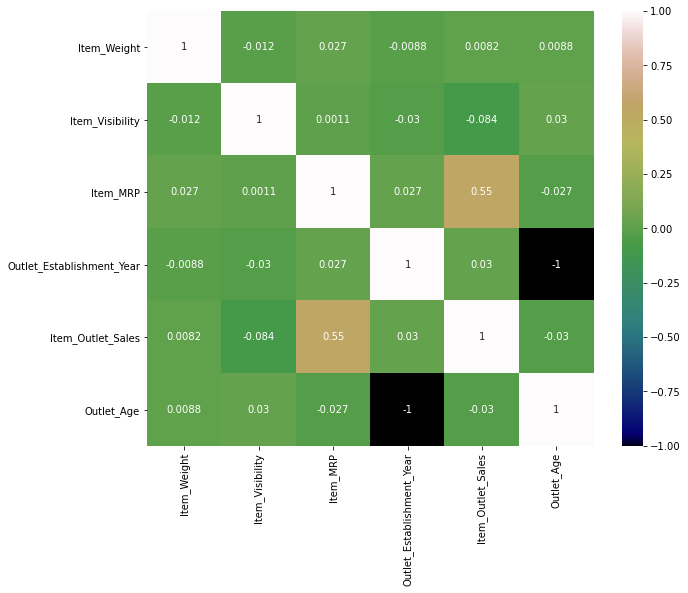

In [127]:
plt.figure(figsize=(10,8))
sns.heatmap(df_Train_new.corr(),annot=True,  cmap='gist_earth')

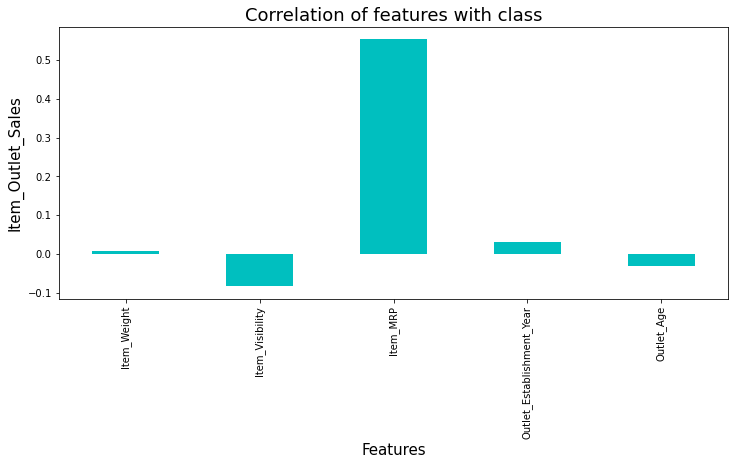

In [128]:
plt.figure(figsize = (12,5))
df_Train_new.corr()['Item_Outlet_Sales'].drop(['Item_Outlet_Sales']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Item_Outlet_Sales',fontsize=15)
plt.title('Correlation of features with class',fontsize = 18)
plt.show()

## Now checking Multicolinarity of features using Variance Inflation Factor

In [129]:
df2=df_Train_new.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined'])

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
vif['Features']= df2.columns
vif

VIF                   Features
0   1.001063                Item_Weight
1   1.011453            Item_Visibility
2   1.448705                   Item_MRP
3  99.964922  Outlet_Establishment_Year
4   1.458085          Item_Outlet_Sales
5   4.173947                 Outlet_Age

In [131]:
df3=df2.drop(columns=['Outlet_Establishment_Year'])

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df3.values,i) for i in range(df3.shape[1])]
vif['Features']= df3.columns
vif

VIF           Features
0   9.281161        Item_Weight
1  16.923520    Item_Visibility
2   8.633609           Item_MRP
3  10.024772  Item_Outlet_Sales
4   4.053296         Outlet_Age

**Now will do the label encoding**

In [133]:
df_Train_new['Item_Fat_Content']=df_Train_new['Item_Fat_Content'].astype('category')
df_Train_new['Item_Type']=df_Train_new['Item_Type'].astype('category')
df_Train_new['Outlet_Identifier']=df_Train_new['Outlet_Identifier'].astype('category')
df_Train_new['Outlet_Size']=df_Train_new['Outlet_Size'].astype('category')
df_Train_new['Outlet_Location_Type']=df_Train_new['Outlet_Location_Type'].astype('category')
df_Train_new['Outlet_Type']=df_Train_new['Outlet_Type'].astype('category')
df_Train_new['Item_Type_Combined']=df_Train_new['Item_Type_Combined'].astype('category')

In [134]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [136]:
df_Train_new['Item_Fat_Content']=labelencoder.fit_transform(df_Train_new['Item_Fat_Content'])
df_Train_new['Item_Type']=labelencoder.fit_transform(df_Train_new['Item_Type'])
df_Train_new['Outlet_Identifier']=labelencoder.fit_transform(df_Train_new['Outlet_Identifier'])
df_Train_new['Outlet_Size'] = labelencoder.fit_transform(df_Train_new['Outlet_Size'])
df_Train_new['Outlet_Location_Type']=labelencoder.fit_transform(df_Train_new['Outlet_Location_Type'])
df_Train_new['Outlet_Type']=labelencoder.fit_transform(df_Train_new['Outlet_Type'])
df_Train_new['Item_Type_Combined']=labelencoder.fit_transform(df_Train_new['Item_Type_Combined'])

In [137]:
# droping item Identifier and Outlet_Establishment_Year as we created alternate columns for them.
df_Train_new=df_Train_new.drop(columns=['Outlet_Establishment_Year','Item_Identifier'])

In [138]:
df_Train_new.shape

(8164, 12)

In [139]:
df_Train_new.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                 0        -1.746644          4  249.8092   
1         5.92                 2        -1.722308         14   48.2692   
2        17.50                 0        -1.741079         10  141.6180   
3        19.20                 2        -1.519199          6  182.0950   
4         8.93                 1        -1.519199          9   53.8614   

   Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                  9            1                     0            1   
1                  3            1                     2            2   
2                  9            1                     0            1   
3                  0            2                     2            0   
4                  1            0                     2            1   

   Item_Outlet_Sales  Item_Type_Combined  Outlet_Age  
0         120.231551                   1          14  
1          40.115213                   0           4  
2          89.591921                   1          14  
3          52.125040                   1          15  
4          61.077895                   2          26

### variance_inflation_factor after label encoding

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df_Train_new.values,i) for i in range(df_Train_new.shape[1])]
vif['Features']= df_Train_new.columns
vif

VIF              Features
0    9.632625           Item_Weight
1    2.070427      Item_Fat_Content
2   40.212017       Item_Visibility
3    3.955471             Item_Type
4   10.172085              Item_MRP
5   14.019086     Outlet_Identifier
6    7.775591           Outlet_Size
7   12.944158  Outlet_Location_Type
8    9.584410           Outlet_Type
9   14.480227     Item_Outlet_Sales
10   5.594035    Item_Type_Combined
11   4.782459            Outlet_Age

<AxesSubplot:>

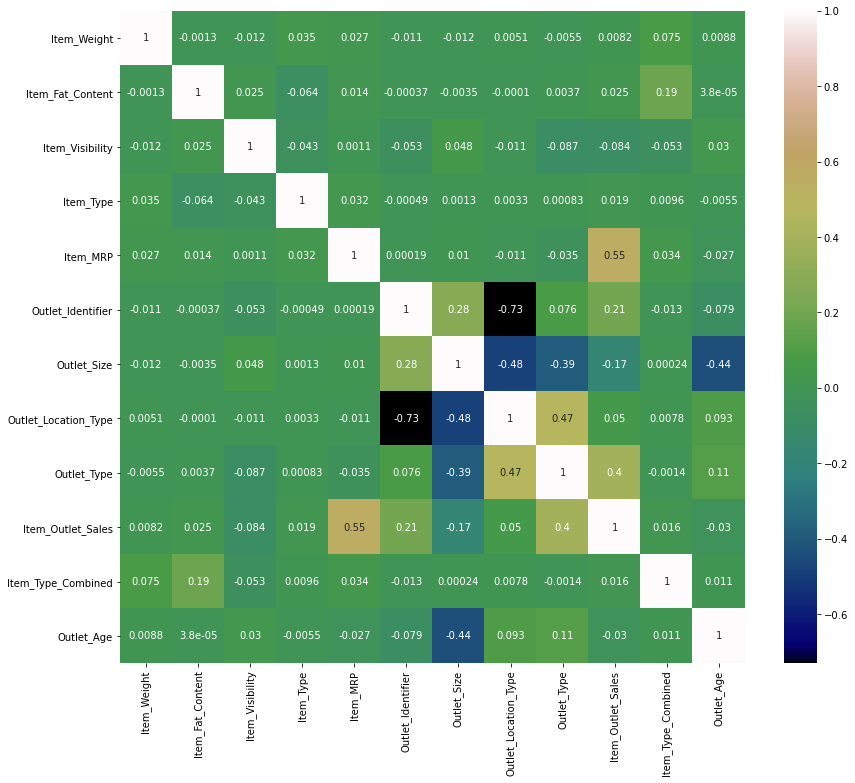

In [142]:
plt.figure(figsize=(14,12))
sns.heatmap(df_Train_new.corr(),annot=True,  cmap='gist_earth')

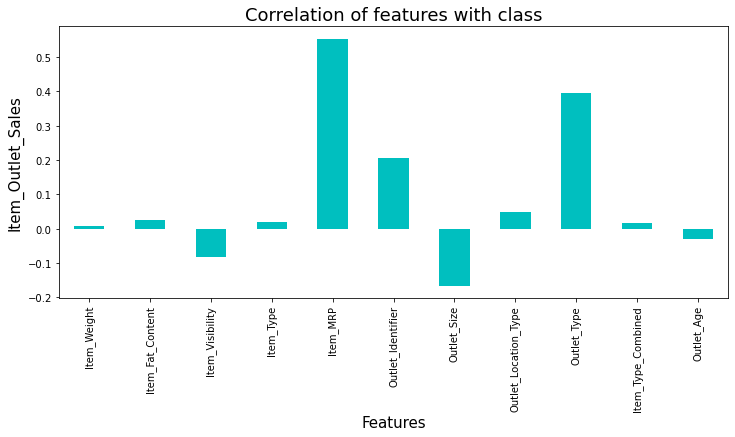

In [143]:
plt.figure(figsize = (12,5))
df_Train_new.corr()['Item_Outlet_Sales'].drop(['Item_Outlet_Sales']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Item_Outlet_Sales',fontsize=15)
plt.title('Correlation of features with class',fontsize = 18)
plt.show()

- Skewness of features

In [144]:
df_Test_new.skew()

Item_Weight                  0.140897
Item_Visibility              0.807693
Item_MRP                     0.131380
Outlet_Establishment_Year   -0.417330
Outlet_Age                   0.417330
dtype: float64

Transforming positive or right skew data using boxcox transformation

In [145]:
from scipy.stats import boxcox

In [146]:
df_Test_new['Item_Visibility']=boxcox(df_Test_new['Item_Visibility'],0.5)

In [147]:
df_Test_new.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014062  0.043981   
Item_Visibility              -0.014062         1.000000 -0.000414   
Item_MRP                      0.043981        -0.000414  1.000000   
Outlet_Establishment_Year     0.013788        -0.056786 -0.010225   
Outlet_Age                   -0.013788         0.056786  0.010225   

                           Outlet_Establishment_Year  Outlet_Age  
Item_Weight                                 0.013788   -0.013788  
Item_Visibility                            -0.056786    0.056786  
Item_MRP                                   -0.010225    0.010225  
Outlet_Establishment_Year                   1.000000   -1.000000  
Outlet_Age                                 -1.000000    1.000000

<AxesSubplot:>

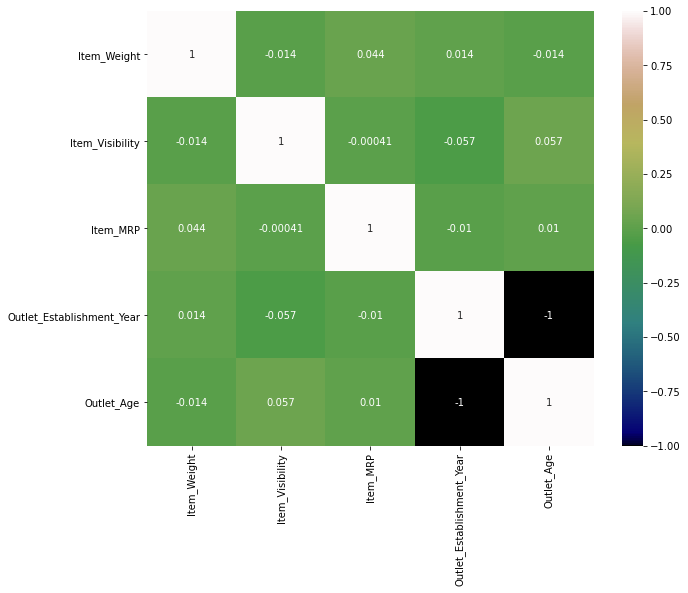

In [148]:
plt.figure(figsize=(10,8))
sns.heatmap(df_Test_new.corr(),annot=True,  cmap='gist_earth')

In [149]:
df4=df_Test_new.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined'])

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features']= df4.columns
vif

VIF                   Features
0    1.002318                Item_Weight
1    1.003413            Item_Visibility
2    1.002056                   Item_MRP
3  105.263455  Outlet_Establishment_Year
4    4.178825                 Outlet_Age

In [151]:
df_Test_new['Item_Fat_Content']=df_Test_new['Item_Fat_Content'].astype('category')
df_Test_new['Outlet_Location_Type']=df_Test_new['Outlet_Location_Type'].astype('category')
df_Test_new['Outlet_Type']=df_Test_new['Outlet_Type'].astype('category')
df_Test_new['Item_Type_Combined']=df_Test_new['Item_Type_Combined'].astype('category')

In [152]:
df_Test_new['Item_Fat_Content']=labelencoder.fit_transform(df_Test_new['Item_Fat_Content'])
df_Test_new['Item_Type']=labelencoder.fit_transform(df_Test_new['Item_Type'])
df_Test_new['Outlet_Identifier']=labelencoder.fit_transform(df_Test_new['Outlet_Identifier'])
df_Test_new['Outlet_Size']=labelencoder.fit_transform(df_Test_new['Outlet_Size'])
df_Test_new['Outlet_Location_Type']=labelencoder.fit_transform(df_Test_new['Outlet_Location_Type'])
df_Test_new['Outlet_Type']=labelencoder.fit_transform(df_Test_new['Outlet_Type'])
df_Test_new['Item_Type_Combined']=labelencoder.fit_transform(df_Test_new['Item_Type_Combined'])

In [153]:
# droping item Identifier and Outlet_Establishment_Year as we created alternate columns for them.
df_Test_new=df_Test_new.drop(columns=['Outlet_Establishment_Year','Item_Identifier'])

In [154]:
df_Test_new.shape

(5547, 11)

- Now will preform Standard Scaling of Train Data

In [155]:
X=df_Train_new.drop(columns =['Item_Outlet_Sales'])
Y=df_Train_new['Item_Outlet_Sales']

In [156]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_train = scaler.fit_transform(X)

In [157]:
X_scale_train

array([[-0.83463523, -0.99978137, -1.40762716, ..., -0.26638538,
        -0.18241886, -0.10833374],
       [-1.62526001,  1.23736132, -1.26145088, ...,  1.03431452,
        -2.09173624, -1.3150968 ],
       [ 1.08344856, -0.99978137, -1.37419751, ..., -0.26638538,
        -0.18241886, -0.10833374],
       ...,
       [-0.53054877,  0.11878998, -0.6760042 , ..., -0.26638538,
         1.72689852, -0.71171527],
       [-1.32351268,  1.23736132,  1.64850929, ...,  1.03431452,
        -0.18241886, -1.3150968 ],
       [ 0.45188438, -0.99978137, -0.38450749, ..., -0.26638538,
        -2.09173624,  0.13301887]])

-  Now will perform standard scaling for test Data

In [158]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_test = scaler.fit_transform(df_Test_new)

In [159]:
X_scale_test

array([[ 1.8846675 , -0.7380346 , -1.91965624, ..., -0.29016951,
        -0.19289173, -0.12388644],
       [-1.0287216 ,  1.35495003, -0.57243787, ..., -0.29016951,
        -0.19289173, -1.08148694],
       [ 0.44552349, -0.7380346 ,  0.90414135, ..., -1.56457196,
         1.71776972, -0.00418637],
       ...,
       [-0.63090943, -0.7380346 ,  0.35571781, ..., -0.29016951,
         1.71776972, -0.48298662],
       [ 0.6093285 ,  1.35495003, -0.02007525, ..., -0.29016951,
        -0.19289173, -1.08148694],
       [-0.74791301,  1.35495003,  1.00358886, ..., -0.29016951,
        -0.19289173, -0.48298662]])

## Now will build the Machine Learning Models

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale_train, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5469, 11)
Training target vector size: (5469,)
Test feature matrix size: (2695, 11)
Test target vector size: (2695,)


## Model 1: Linear Regression


In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale_train, Y, random_state=16, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted sales:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual sales:'+'\033[0m\n',Y_test)

Predicted sales:
 [ 72.90088063  98.58856561  47.16704277 ... 110.94323867  87.96589504
  44.2035555 ]


Actual sales:
 2556     35.070355
1802    102.596489
4938     27.009847
5826    135.895787
7077     52.272453
           ...    
6605     65.088062
3629     89.766216
4098     66.773855
5628    107.946645
7265     74.943444
Name: Item_Outlet_Sales, Length: 2695, dtype: float64


## Linear Regression Evaluation Matrix

In [163]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 18.874841483738166
Mean squared error : 548.9712797635653
Root Mean Squared Error: 23.43013614479364


 R2 Score :
0.5538321382018198


 True Values Vs Predicted Value plot :


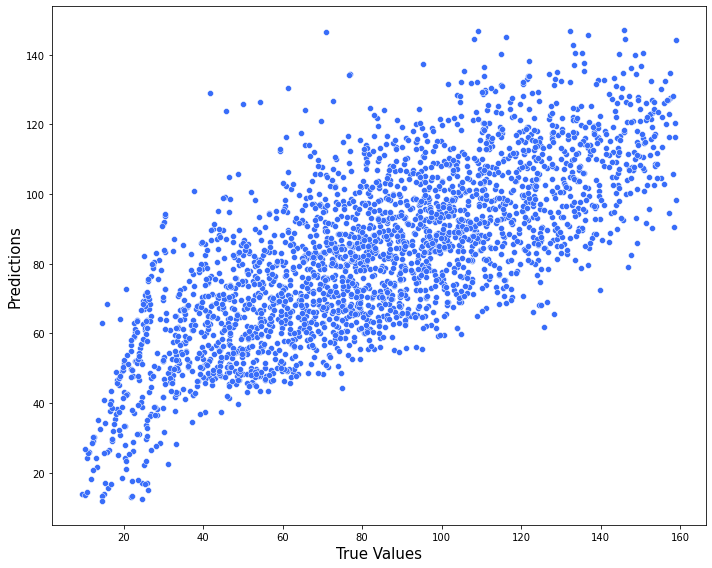

In [164]:
plt.figure(figsize=(10,8))
y_pred=lin_reg.predict(X_test)
sns.scatterplot(Y_test.round(2), y_pred, cmap='hsv')
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Model 2:  K Neighbors Regressor


In [165]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 29.322996404865147
RMSE value for k=  2 is: 25.23156742797232
RMSE value for k=  3 is: 23.481427167490754
RMSE value for k=  4 is: 22.579300044092182
RMSE value for k=  5 is: 22.16043976303122
RMSE value for k=  6 is: 22.032111990650705
RMSE value for k=  7 is: 21.91813220647353
RMSE value for k=  8 is: 21.846029619787103
RMSE value for k=  9 is: 21.72969532329676
RMSE value for k=  10 is: 21.74319438136665
RMSE value for k=  11 is: 21.695772864875153
RMSE value for k=  12 is: 21.61904101194721
RMSE value for k=  13 is: 21.56416851924708
RMSE value for k=  14 is: 21.56581280449929
RMSE value for k=  15 is: 21.51762955416595
RMSE value for k=  16 is: 21.513403074734452
RMSE value for k=  17 is: 21.55154916124068
RMSE value for k=  18 is: 21.527705787644546
RMSE value for k=  19 is: 21.53769262821701
RMSE value for k=  20 is: 21.52478469362475
RMSE value for k=  21 is: 21.52657341512055
RMSE value for k=  22 is: 21.547756994049184
RMSE value for k=  23 is: 21.585

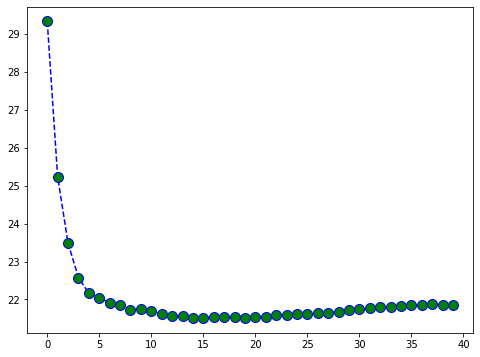

In [166]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(40), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

- Comment- 
At k= 16, we get the minimum RMSE value which approximately 21.513403074734452, and shoots up on further increasing the k value. We can safely say that k=20 will give us the best result in this case

----------------------------------------------------------------------------------------------------------------------

## Model 3: Random Forest Regressor
## Model 4: SVR
## Model 5: Decision Tree Regressor
## Model 6: Adaboost
## Model 7: Gradient Boosting Regressor
## Model 8: XGBoost Regressor

In [168]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor(n_neighbors=16)
xgb=XGBRegressor()
model = [rf,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 16.153815937648385
Mean squared error : 435.58598597622296
Root Mean Squared Error: 20.870696825363137


 R2 Score :
0.6459842706599057




 Error of  SVR() :
Mean absolute error : 16.603164110791255
Mean squared error : 435.38480674956537
Root Mean Squared Error: 20.86587661109797


 R2 Score :
0.6461477759446169




 Error of  DecisionTreeRegressor() :
Mean absolute error : 21.845851474909825
Mean squared error : 832.0754441240111
Root Mean Squared Error: 28.845717951266373


 R2 Score :
0.32374363569716846




 Error of  AdaBoostRegressor() :
Mean absolute error : 16.37841385835251
Mean squared error : 436.65038854449017
Root Mean Squared Error: 20.89618119524451


 R2 Score :
0.6451191940420892




 Error of  GradientBoostingRegressor() :
Mean absolute error : 15.379280819157753
Mean squared error : 390.31517844434313
Root Mean Squared Error: 19.756395887011962


 R2 Score :
0.6827774147512959




 Error of  KNeighborsReg



 True Values Vs Predicted Value plot RandomForestRegressor() :


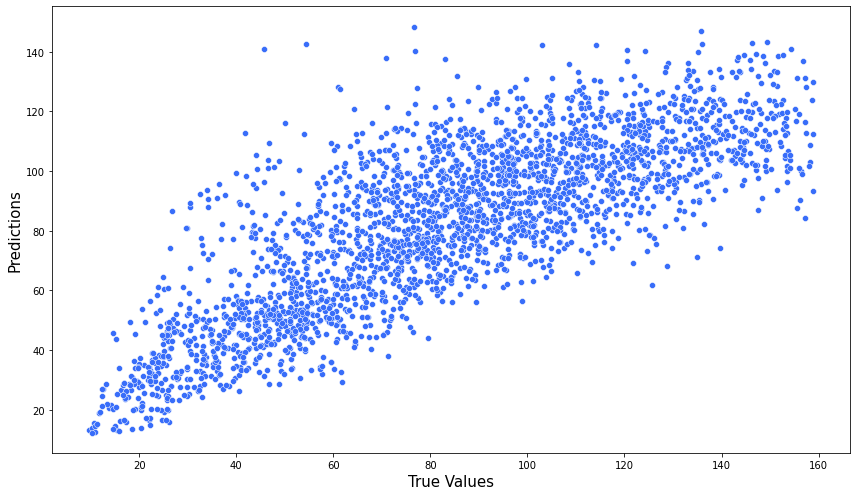





 True Values Vs Predicted Value plot SVR() :


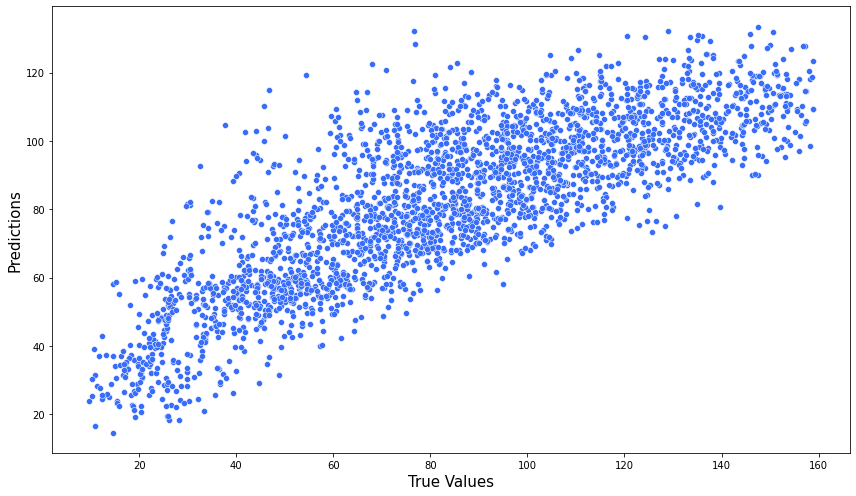





 True Values Vs Predicted Value plot DecisionTreeRegressor() :


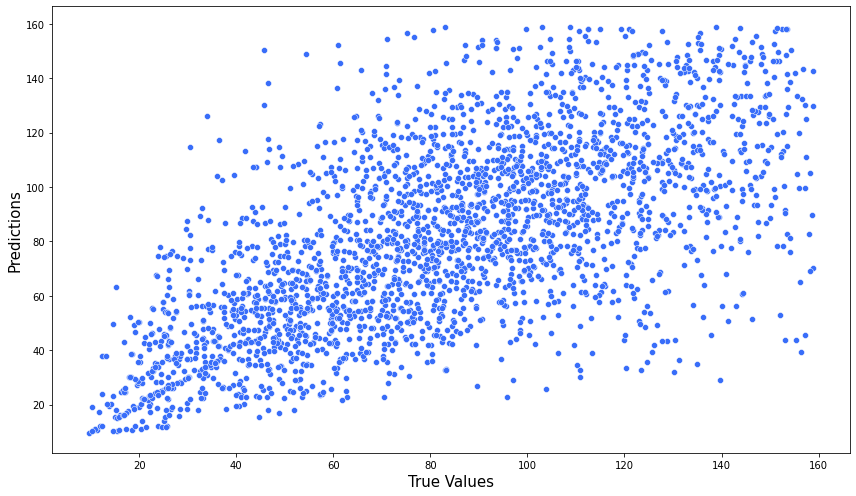





 True Values Vs Predicted Value plot AdaBoostRegressor() :


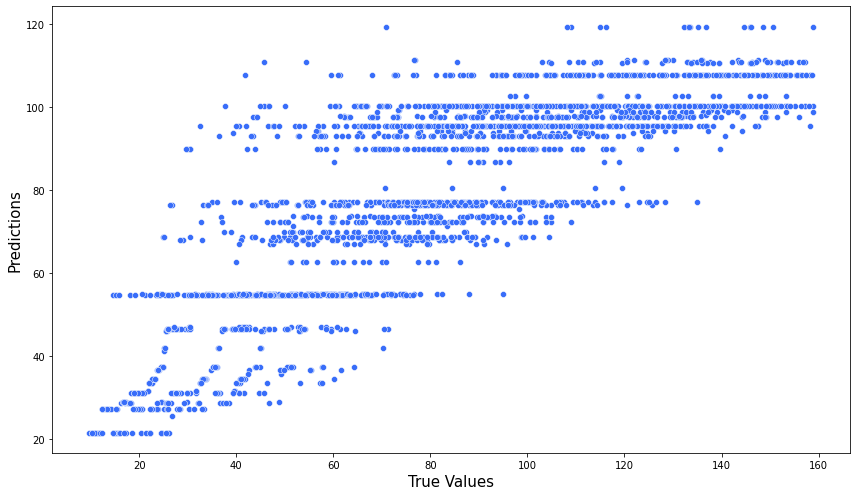





 True Values Vs Predicted Value plot GradientBoostingRegressor() :


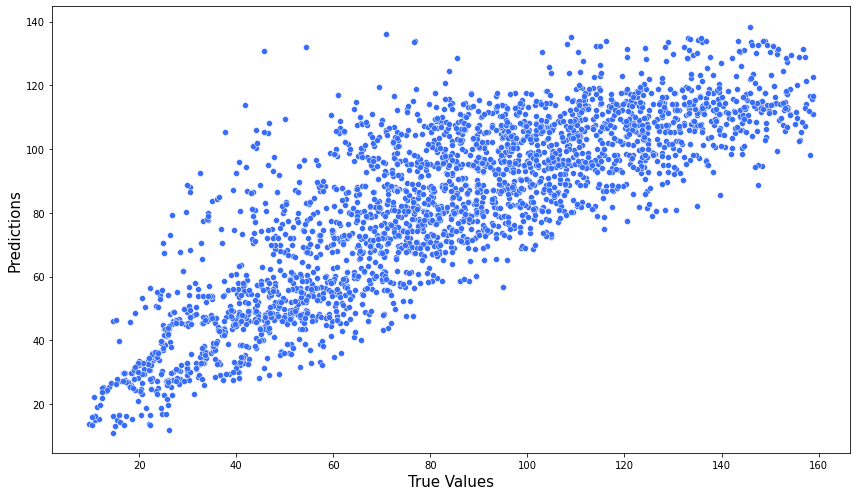





 True Values Vs Predicted Value plot KNeighborsRegressor(n_neighbors=15) :


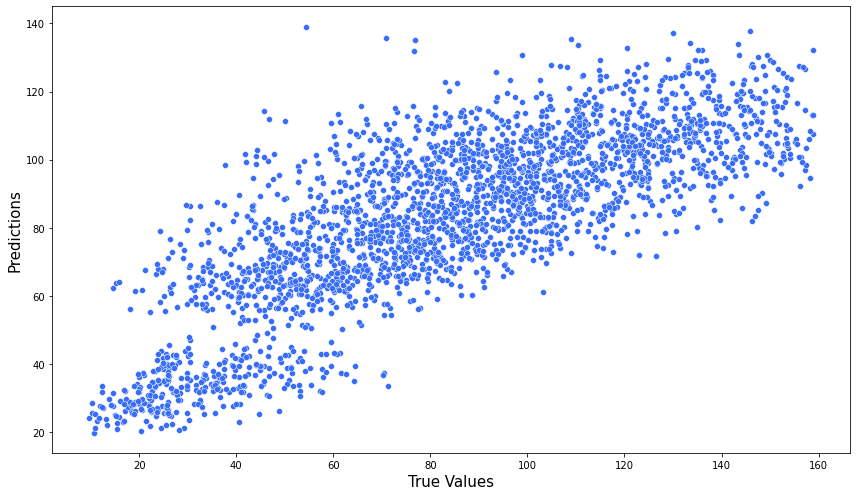





 True Values Vs Predicted Value plot XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :


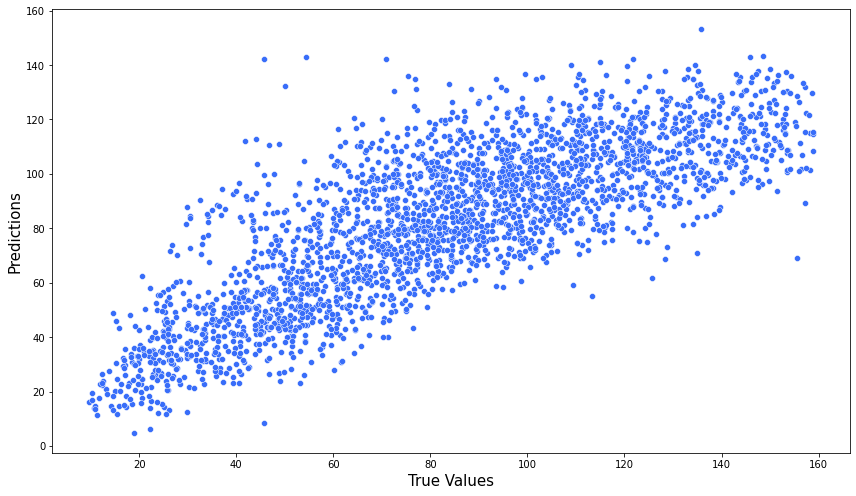

In [169]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor(n_neighbors=15)
model = [rf,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(12,7))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

In [171]:
from sklearn.model_selection import cross_val_score
model = [lin_reg,rf,svr,dtc,adb,gradb,knn,xgb]
for m in model:
    score = cross_val_score(m, X, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))
    print('\n')
    print('==============================================================================================================')



Cross Validation Score : LinearRegression() :

Score : [0.5292995  0.51167276 0.5266652  0.52724571]
Mean Score : 0.523720792429331
Std deviation : 0.007024452270263471


 R2 Score :
0.6437123809860317




Cross Validation Score : RandomForestRegressor() :

Score : [0.59488383 0.59019802 0.62783709 0.60849626]
Mean Score : 0.6053538008921444
Std deviation : 0.014617550689928059


 R2 Score :
0.6437123809860317




Cross Validation Score : SVR() :

Score : [0.32304246 0.30544195 0.32345295 0.30144876]
Mean Score : 0.3133465296718927
Std deviation : 0.010002375039425766


 R2 Score :
0.6437123809860317




Cross Validation Score : DecisionTreeRegressor() :

Score : [0.23617569 0.25887072 0.2892358  0.2259943 ]
Mean Score : 0.25256912762779815
Std deviation : 0.024285390673889743


 R2 Score :
0.6437123809860317




Cross Validation Score : AdaBoostRegressor() :

Score : [0.59995394 0.61961519 0.62870305 0.62795263]
Mean Score : 0.6190562007659542
Std deviation : 0.011591128002027731




- ***from above cross validattion, we can see that Gradient Boosting Regressor() gives us maximum R2 score(0.6238449573040779) and with maximum mean score of 0.6504855259743363. So we will apply Hyperparameter tuning on Gradient Boosting Regressor***

## Hyper Parameter Tuning : GridSearchCV

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
parameters = [{   'learning_rate': [0.01,0.03,0.04],
                  'subsample'    : [0.5, 0.3, 0.1],
                  'n_estimators' : [250,500,750],
                  'max_depth'    : [6,8,10]}] 

In [174]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameters,cv=3,n_jobs = -1, verbose=3)
GCV.fit(X_train,Y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.03, 0.04],
                          'max_depth': [6, 8, 10],
                          'n_estimators': [250, 500, 750],
                          'subsample': [0.5, 0.3, 0.1]}],
             verbose=3)

In [175]:
GCV.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 250, 'subsample': 0.5}

## Final Model

In [176]:
Final_mod = GradientBoostingRegressor(learning_rate=0.01 ,n_estimators= 250, max_depth=6 ,subsample=0.5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 15.680726048366365
Mean squared error : 402.254777941566
Root Mean Squared Error: 20.05629023377868


 R2 Score of Final Model :
0.6730736911235374




 True Values Vs Predicted Value plot :


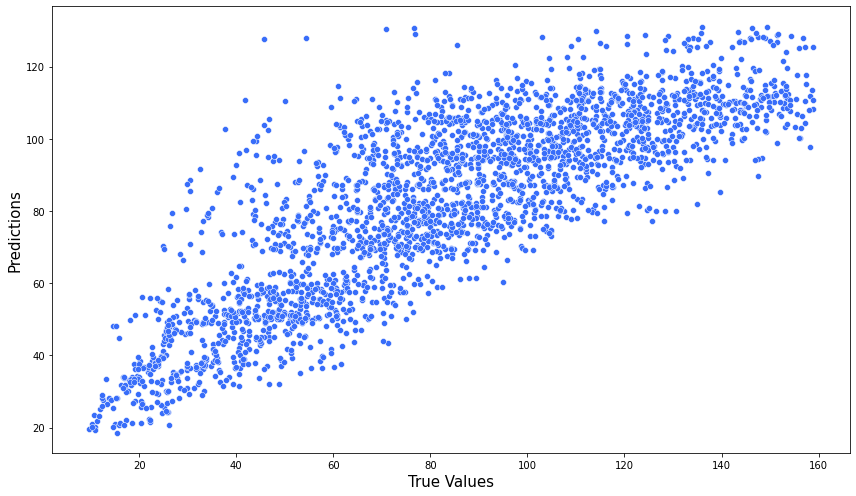

In [177]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.scatterplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### Finding important features

<AxesSubplot:>

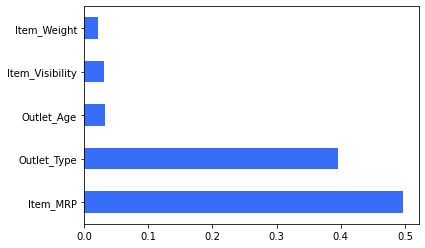

In [178]:
feat_importances = pd.Series(Final_mod.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

### Saving Final Model

In [179]:
import joblib
joblib.dump(Final_mod,'Big_Data_Mart_Sales_Final.pkl')

['Big_Data_Mart_Sales_Final.pkl']

### Predication on Test data

In [180]:
y_pred=Final_mod.predict(X_scale_test)

In [181]:
y_pred

array([ 76.82772558,  69.51599323,  55.15030667, ...,  82.31984508,
       108.90598992,  70.45384567])